<a href="https://colab.research.google.com/github/Mushfiq12696/Deep_learning_project/blob/main/Protein_sequence_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep embedding library

In [2]:
pip install sgt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd

Reading csv file 

In [14]:
df = pd.read_csv('/content/New_Protein4.csv')

In [ ]:
df.head()

In [ ]:
df[["Properties"]]

splitting property coloumn 

In [21]:
df[['Accession','Host','SubType','P_Name']] = df.Properties.str.split(" ", expand = True)

In [ ]:
df[["SubType"]]

In [ ]:
df[' Sequence']

Splitting sequences 

In [25]:
X = df[' Sequence']
def split(word):
  return [char for char in word]
sequences = [split(x) for x in X]

In [ ]:
print(sequences[98])
len(sequences[98])

iporting embedded libraries

In [27]:
import sgt
sgt.__version__
from sgt import SGT

In [ ]:
df

REmoving all the unneccessary coloumns

In [ ]:
new_data = df.drop(['Properties','Accession','Host','P_Name',],axis =1)
new_data

In [ ]:
sequences

In [ ]:
# Loading data
#Tokenization


# Data preprocessing
new_data = new_data.loc[:,['SubType',' Sequence']]
new_data.columns = ['id', 'sequence']
new_data['sequence'] = new_data['sequence'].map(list)
new_data

In [ ]:
pip install pandarallel

In [35]:
import pandarallel  # required library for multiprocessing

In [ ]:
%%time
# Compute SGT embeddings
#Applying Deep Embedding network

sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(new_data)

In [ ]:
sgtembedding_df

In [ ]:
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

In [40]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=3)
pca.fit(sgtembedding_df)

X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['H5N1', 'H5N3','H1N1'])
df.head()

In [46]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

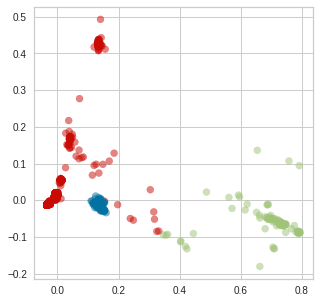

In [86]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g',3: 'b',}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['H5N1'], df['H1N1'], color=colors, alpha=0.5, edgecolor=colors)

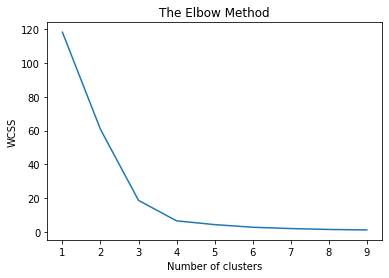

In [77]:
#Using the elbow method to find the optimum number of cluster

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

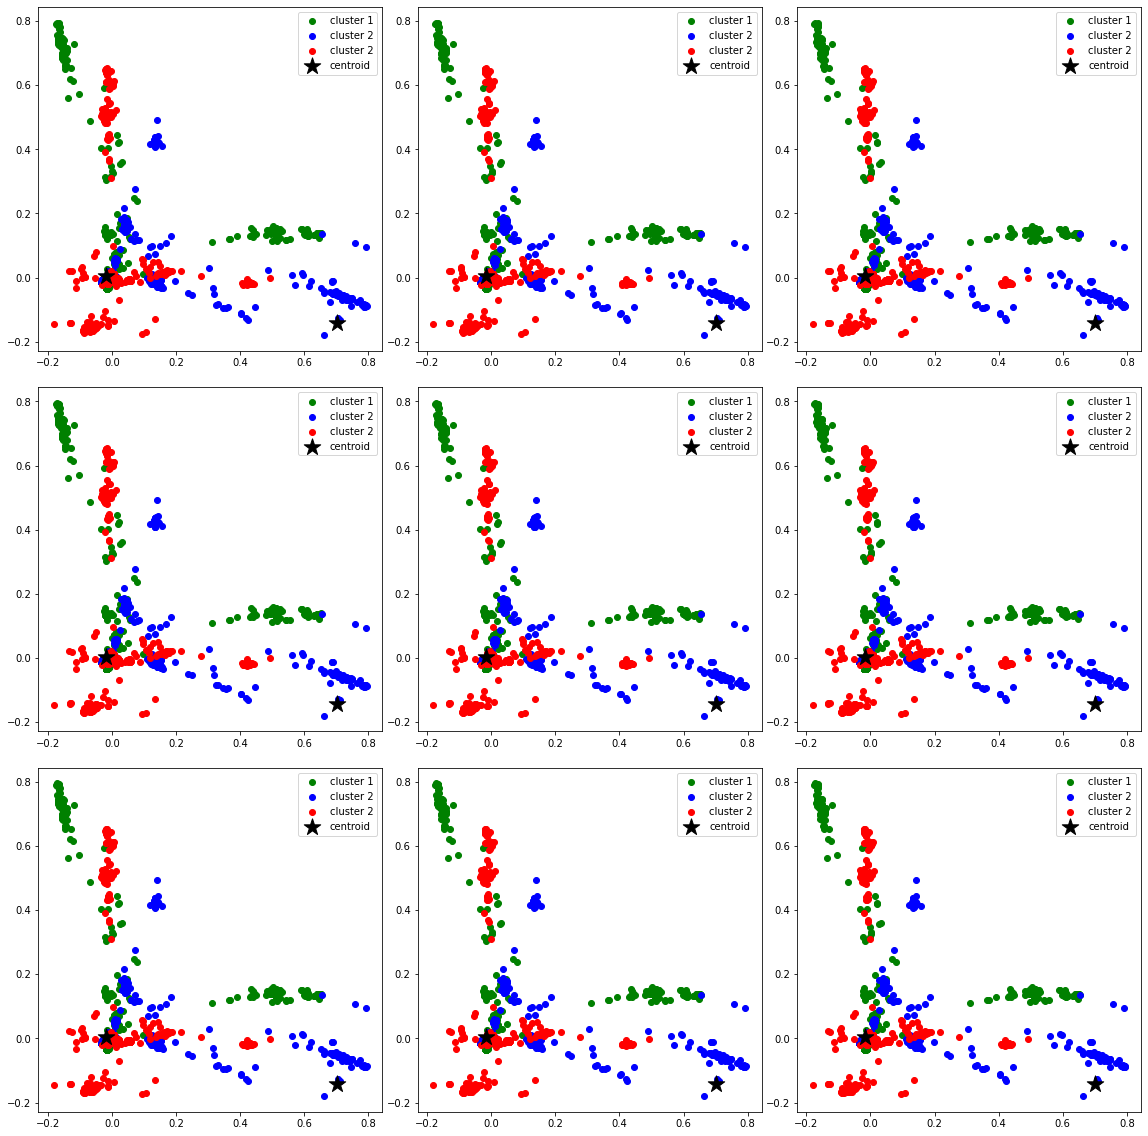

In [80]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3,
                random_state=10)
    km.fit(df)
    #labels = kmeans.predict(df)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(df['H5N3'], df['H5N1'],
                  c='green', label='cluster 1')
    ax[i].scatter(df['H5N1'], df['H1N1'],
                  c='blue', label='cluster 2'),
    ax[i].scatter(df['H1N1'], df['H5N3'],
                  c='red', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='k', marker='*', s=300, label='centroid')
    #ax[i].set_xlim([-2, 2])
    #ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='upper right')
    #ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

In [82]:
from yellowbrick.cluster import SilhouetteVisualizer

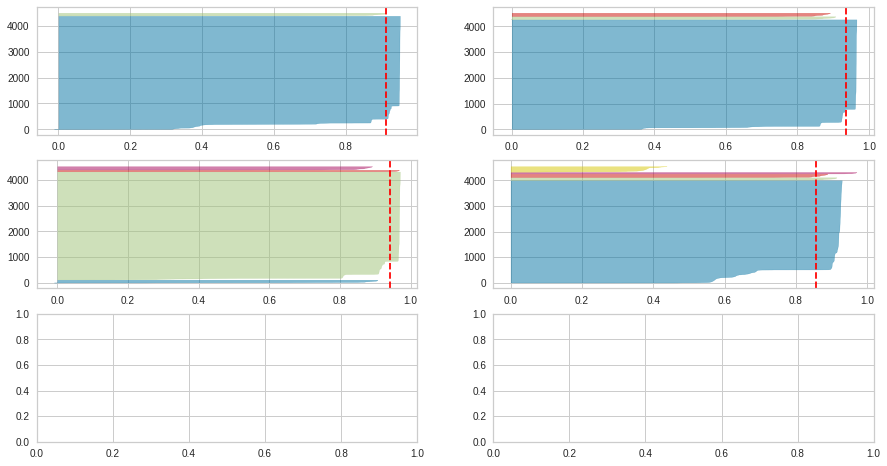

In [83]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df) 